<h3> NBA 5 year careeer prediction data set prep

<h5> The aim is to explore and analyse data sets provided and feature engineer them in order to obtain reliable predictions

In [1]:
#Import initial packages
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE

<h4> <b> 1. Load and Explore Train Dataset

In [2]:
df = pd.read_csv('../data/raw/2022_train.csv')

In [3]:
df.shape

(8000, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Id           8000 non-null   int64  
 1   GP           8000 non-null   int64  
 2   MIN          8000 non-null   float64
 3   PTS          8000 non-null   float64
 4   FGM          8000 non-null   float64
 5   FGA          8000 non-null   float64
 6   FG%          8000 non-null   float64
 7   3P Made      8000 non-null   float64
 8   3PA          8000 non-null   float64
 9   3P%          8000 non-null   float64
 10  FTM          8000 non-null   float64
 11  FTA          8000 non-null   float64
 12  FT%          8000 non-null   float64
 13  OREB         8000 non-null   float64
 14  DREB         8000 non-null   float64
 15  REB          8000 non-null   float64
 16  AST          8000 non-null   float64
 17  STL          8000 non-null   float64
 18  BLK          8000 non-null   float64
 19  TOV   

In [5]:
df.describe()

,Id,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
count,8000.00000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,...,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,7798.50000,62.777875,18.576662,7.267088,2.807037,6.231212,44.608900,0.264525,0.816562,19.583700,...,1.947788,71.365825,1.077838,2.168500,3.245300,1.624513,0.648687,0.245212,1.257763,0.833625
std,2309.54541,17.118774,8.935263,4.318732,1.693373,3.584559,6.155453,0.384093,1.060964,16.003155,...,1.252352,10.430447,0.785670,1.392224,2.085154,1.355986,0.407626,0.821037,0.723270,0.372440
min,3799.00000,-8.000000,2.900000,0.800000,0.300000,0.800000,21.300000,-1.100000,-3.100000,-38.500000,...,0.000000,-13.300000,0.000000,0.200000,0.300000,0.000000,0.000000,-17.900000,0.100000,0.000000
25%,5798.75000,51.000000,12.000000,4.100000,1.600000,3.600000,40.400000,0.000000,0.100000,8.400000,...,1.000000,65.000000,0.500000,1.100000,1.700000,0.700000,0.300000,0.100000,0.700000,1.000000
50%,7798.50000,63.000000,16.800000,6.300000,2.400000,5.400000,44.400000,0.300000,0.800000,19.500000,...,1.700000,71.400000,0.900000,1.900000,2.800000,1.300000,0.600000,0.200000,1.100000,1.000000
75%,9798.25000,74.000000,23.500000,9.500000,3.700000,8.100000,48.700000,0.500000,1.500000,30.600000,...,2.600000,77.500000,1.500000,2.900000,4.300000,2.200000,0.900000,0.400000,1.600000,1.000000
max,11798.00000,123.000000,73.800000,34.200000,13.100000,28.900000,67.200000,1.700000,4.700000,82.100000,...,11.100000,168.900000,5.500000,11.000000,15.900000,12.800000,3.600000,18.900000,5.300000,1.000000


In [6]:
df[df["TARGET_5Yrs"]==0].describe()

,Id,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
count,1331.000000,1331.000000,1331.000000,1331.000000,1331.000000,1331.000000,1331.000000,1331.000000,1331.000000,1331.000000,...,1331.000000,1331.000000,1331.000000,1331.000000,1331.00000,1331.000000,1331.000000,1331.000000,1331.000000,1331.0
mean,7764.149512,53.501127,14.932682,5.507739,2.111270,4.928325,42.420210,0.251615,0.808340,20.012697,...,1.452968,70.445304,0.774305,1.644778,2.42562,1.330804,0.531555,0.063937,1.012923,0.0
std,2284.210496,16.057995,7.199469,3.397495,1.309242,2.870119,5.999187,0.381631,1.053072,16.147073,...,1.017544,10.186075,0.608425,1.108596,1.64057,1.148362,0.341199,1.034295,0.599936,0.0
min,3811.000000,-8.000000,2.900000,0.800000,0.300000,0.800000,25.600000,-1.100000,-3.100000,-33.400000,...,0.000000,23.700000,0.000000,0.200000,0.30000,0.000000,0.000000,-17.900000,0.100000,0.0
25%,5787.000000,43.000000,9.700000,2.950000,1.100000,2.800000,38.250000,0.000000,0.100000,9.150000,...,0.700000,63.700000,0.300000,0.900000,1.20000,0.500000,0.300000,0.000000,0.600000,0.0
50%,7704.000000,53.000000,13.500000,4.700000,1.800000,4.200000,42.100000,0.200000,0.800000,19.900000,...,1.200000,70.600000,0.600000,1.400000,2.00000,1.000000,0.500000,0.200000,0.900000,0.0
75%,9695.000000,64.000000,18.800000,7.100000,2.700000,6.300000,46.500000,0.500000,1.500000,30.550000,...,1.900000,76.600000,1.100000,2.100000,3.10000,1.900000,0.700000,0.300000,1.300000,0.0
max,11793.000000,107.000000,51.400000,25.000000,9.800000,21.000000,65.300000,1.600000,4.600000,73.700000,...,6.500000,124.900000,3.500000,8.500000,11.80000,8.900000,2.300000,9.600000,3.400000,0.0


In [7]:
df[df["TARGET_5Yrs"]==1].describe()

,Id,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
count,6669.000000,6669.000000,6669.000000,6669.000000,6669.000000,6669.000000,6669.000000,6669.000000,6669.000000,6669.000000,...,6669.000000,6669.000000,6669.000000,6669.000000,6669.000000,6669.000000,6669.000000,6669.000000,6669.000000,6669.0
mean,7805.355676,64.629330,19.303929,7.618219,2.945899,6.491243,45.045719,0.267102,0.818204,19.498081,...,2.046544,71.549543,1.138417,2.273024,3.408892,1.683131,0.672065,0.281392,1.306628,1.0
std,2314.677310,16.718539,9.069595,4.396696,1.726871,3.655725,6.093200,0.384559,1.062603,15.974117,...,1.271339,10.469601,0.802867,1.419288,2.125565,1.386373,0.415717,0.766430,0.735796,0.0
min,3799.000000,-3.000000,3.300000,0.900000,0.300000,0.900000,21.300000,-1.100000,-2.600000,-38.500000,...,0.000000,-13.300000,0.000000,0.200000,0.300000,0.000000,0.000000,-15.700000,0.100000,1.0
25%,5801.000000,53.000000,12.600000,4.400000,1.700000,3.800000,40.900000,0.000000,0.100000,8.200000,...,1.100000,65.300000,0.500000,1.200000,1.800000,0.700000,0.400000,0.100000,0.800000,1.0
50%,7811.000000,64.000000,17.600000,6.700000,2.600000,5.700000,44.900000,0.300000,0.800000,19.400000,...,1.800000,71.500000,1.000000,2.000000,3.000000,1.300000,0.600000,0.200000,1.200000,1.0
75%,9824.000000,76.000000,24.500000,9.900000,3.900000,8.400000,49.000000,0.500000,1.500000,30.600000,...,2.700000,77.600000,1.500000,3.000000,4.500000,2.300000,0.900000,0.400000,1.700000,1.0
max,11798.000000,123.000000,73.800000,34.200000,13.100000,28.900000,67.200000,1.700000,4.700000,82.100000,...,11.100000,168.900000,5.500000,11.000000,15.900000,12.800000,3.600000,18.900000,5.300000,1.0


<h5> As seen in the last 2 tables, there are negative values on the features, which shouldn't be the case. therefore we will transform negative values to positive

In [8]:
df = df.abs()

In [9]:
df[df["TARGET_5Yrs"]==0].describe()

,Id,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
count,1331.000000,1331.000000,1331.000000,1331.000000,1331.000000,1331.000000,1331.000000,1331.000000,1331.000000,1331.000000,...,1331.000000,1331.000000,1331.000000,1331.000000,1331.00000,1331.000000,1331.000000,1331.000000,1331.000000,1331.0
mean,7764.149512,53.513148,14.932682,5.507739,2.111270,4.928325,42.420210,0.365064,1.069046,21.588505,...,1.452968,70.445304,0.774305,1.644778,2.42562,1.330804,0.531555,0.370473,1.012923,0.0
std,2284.210496,16.017859,7.199469,3.397495,1.309242,2.870119,5.999187,0.275006,0.786859,13.968650,...,1.017544,10.186075,0.608425,1.108596,1.64057,1.148362,0.341199,0.967731,0.599936,0.0
min,3811.000000,1.000000,2.900000,0.800000,0.300000,0.800000,25.600000,0.000000,0.000000,0.000000,...,0.000000,23.700000,0.000000,0.200000,0.30000,0.000000,0.000000,0.000000,0.100000,0.0
25%,5787.000000,43.000000,9.700000,2.950000,1.100000,2.800000,38.250000,0.100000,0.400000,10.600000,...,0.700000,63.700000,0.300000,0.900000,1.20000,0.500000,0.300000,0.100000,0.600000,0.0
50%,7704.000000,53.000000,13.500000,4.700000,1.800000,4.200000,42.100000,0.300000,0.900000,20.200000,...,1.200000,70.600000,0.600000,1.400000,2.00000,1.000000,0.500000,0.200000,0.900000,0.0
75%,9695.000000,64.000000,18.800000,7.100000,2.700000,6.300000,46.500000,0.500000,1.500000,30.600000,...,1.900000,76.600000,1.100000,2.100000,3.10000,1.900000,0.700000,0.400000,1.300000,0.0
max,11793.000000,107.000000,51.400000,25.000000,9.800000,21.000000,65.300000,1.600000,4.600000,73.700000,...,6.500000,124.900000,3.500000,8.500000,11.80000,8.900000,2.300000,17.900000,3.400000,0.0


In [10]:
df[df["TARGET_5Yrs"]==1].describe()

,Id,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
count,6669.000000,6669.000000,6669.000000,6669.000000,6669.000000,6669.000000,6669.000000,6669.000000,6669.000000,6669.000000,...,6669.000000,6669.000000,6669.000000,6669.000000,6669.000000,6669.000000,6669.000000,6669.000000,6669.000000,6669.0
mean,7805.355676,64.630229,19.303929,7.618219,2.945899,6.491243,45.045719,0.375723,1.083131,21.126931,...,2.046544,71.553531,1.138417,2.273024,3.408892,1.683131,0.672065,0.385365,1.306628,1.0
std,2314.677310,16.715060,9.069595,4.396696,1.726871,3.655725,6.093200,0.279375,0.790781,13.747380,...,1.271339,10.442302,0.802867,1.419288,2.125565,1.386373,0.415717,0.719777,0.735796,0.0
min,3799.000000,3.000000,3.300000,0.900000,0.300000,0.900000,21.300000,0.000000,0.000000,0.000000,...,0.000000,13.300000,0.000000,0.200000,0.300000,0.000000,0.000000,0.000000,0.100000,1.0
25%,5801.000000,53.000000,12.600000,4.400000,1.700000,3.800000,40.900000,0.200000,0.400000,9.800000,...,1.100000,65.300000,0.500000,1.200000,1.800000,0.700000,0.400000,0.100000,0.800000,1.0
50%,7811.000000,64.000000,17.600000,6.700000,2.600000,5.700000,44.900000,0.300000,0.900000,19.700000,...,1.800000,71.500000,1.000000,2.000000,3.000000,1.300000,0.600000,0.300000,1.200000,1.0
75%,9824.000000,76.000000,24.500000,9.900000,3.900000,8.400000,49.000000,0.500000,1.600000,30.700000,...,2.700000,77.600000,1.500000,3.000000,4.500000,2.300000,0.900000,0.400000,1.700000,1.0
max,11798.000000,123.000000,73.800000,34.200000,13.100000,28.900000,67.200000,1.700000,4.700000,82.100000,...,11.100000,168.900000,5.500000,11.000000,15.900000,12.800000,3.600000,18.900000,5.300000,1.0


<h4> 1.1 Training sets results 

<h5> There are 8000 rows with 20 predictors and 1 binary target (0 or 1) with no null or missing values

<h4> 1.2 Review if dataset is balanced

<h5> As dataset is binary classification of 0 and 1, balance on the two classes needs to be assessed in order to not overfit the  model. This will be assessed with a custom function that returns a table with the number of records for each class

In [11]:
#Reviewing if data is imbalanced with custom function
from src.data.sets import review_balance_df

In [12]:
review_balance_df(df,"TARGET_5Yrs")

,No. of 1,No. of 0
0,6669,1331


<h5> The results show an overweith of 83% for the overweighted class compared to the minority class. Thus, dataset is imbalanced towards the positive target value

<h4> <b> 2. Clean Dataset

<h5> Firstly, the unique identifier needs to be removed from the training data set

In [13]:
df['MIN2'] = df['MIN']**(1/3)
df['AST2'] = df['AST']**(1/3)
df['PTS2'] = df['PTS']**(1/3)
df['FGM2'] = df['FGM']**(1/3)
df['FGA2'] = df['FGA']**(1/3)
df['FTM2'] = df['FTM']**(1/3)
df['FTA2'] = df['FTA']**(1/3)
df['OREB2'] = df['OREB']**(1/3)
df['DREB2'] = df['DREB']**(1/3)
df['REB2'] = df['REB']**(1/3)
df['STL2'] = df['STL']**(1/3)
df['TOV2'] = df['TOV']**(1/3)

In [14]:
df = df.drop(['Id', 'MIN', 'AST', 'PTS', 'FGM', 'FGA', 'FTM', 'FTA', 'OREB', 'DREB', 'REB', 'STL', 'TOV'], axis = 1)

In [15]:
df_cleaned = df.copy()
#df_cleaned.drop('Id', axis=1, inplace=True)
df_cleaned.head()

,GP,FG%,3P Made,3PA,3P%,FT%,BLK,TARGET_5Yrs,MIN2,AST2,PTS2,FGM2,FGA2,FTM2,FTA2,OREB2,DREB2,REB2,STL2,TOV2
0,80,45.7,0.1,0.3,22.6,72.1,0.2,1,2.896468,1.473613,1.983192,1.442250,1.856636,1.259921,1.426043,1.300591,1.259921,1.560491,1.032280,1.169607
1,75,55.1,0.3,1.0,34.9,67.8,0.6,1,2.793522,0.887904,2.189760,1.613429,1.991632,1.338866,1.532619,1.532619,1.546680,1.875777,0.793701,1.118689
2,85,42.8,0.4,1.2,34.3,75.7,0.2,1,2.673075,0.928318,1.650964,1.238562,1.650964,0.736806,0.843433,0.843433,1.216440,1.338866,0.736806,0.843433
3,63,52.5,0.3,0.8,23.7,66.9,0.1,1,2.673075,1.216440,2.016530,1.518294,1.885204,0.965489,1.144714,0.928318,1.259921,1.442250,0.736806,1.238562
4,63,50.8,0.5,1.4,13.7,54.0,0.6,1,2.610999,0.736806,1.546680,1.193483,1.503695,0.584804,0.793701,1.338866,1.392477,1.698499,0.736806,0.887904


<h5> We will save a copy of the data frame in a new variable that will be used for feature engineering and resampling <br> <br>
    Also, Target column will be saved on a variable
    

In [16]:
df_engineered = df_cleaned.copy()

In [17]:
target = df_engineered.pop("TARGET_5Yrs")

<h4> <b> 3. Feature engineering </b>

<h5> With the features available in the data set, we can calculate new features to increase the model accuracy. Offensive rating, true shooting percentage, points per possesion formulas can be found here:

[NBA Stats Formulas](https://bleacherreport.com/articles/1039116-understanding-the-nba-explaining-advanced-offensive-stats-and-metrics)


<h5> Additional features are calculated referencing numbers of games played as well

In [18]:
#Minutes played per game
#df_engineered["Min_per_GP"] = np.where(df_engineered["GP"]>0, df_engineered["MIN"] / df_engineered["GP"],0)

In [19]:
# 3 points per game
#df_engineered["3P_per_GP"] = np.where(df_engineered["GP"]>0, df_engineered["3P Made"] / df_engineered["GP"],0)

In [20]:
#Steals per game
#df_engineered["Stl_per_GP"] = np.where(df_engineered["GP"]>0, df_engineered["STL"] / df_engineered["GP"],0)

In [21]:
#Blocks per game
#df_engineered["Blk_per_GP"] = np.where(df_engineered["GP"]>0, df_engineered["BLK"] / df_engineered["GP"],0)

In [22]:
#Rebounds per game
#df_engineered["Reb_per_GP"] = np.where(df_engineered["GP"]>0, df_engineered["REB"] / df_engineered["GP"],0)

In [23]:
#Offensive Raiting
#df_engineered["ORtg"] = np.where(df_engineered["GP"]>0, 
                                 #(100*df_engineered["PTS"]) / 
                                 #(df_engineered["FGA"] + 0.44* df_engineered["FTA"]+df_engineered["TOV"]),0)

In [24]:
#Points per Possesion
#df_engineered["PPP"] = np.where(df_engineered["GP"]>0, 
                                 #(df_engineered["PTS"]) / 
                                 #(df_engineered["FGA"] + 0.44* df_engineered["FTA"]+df_engineered["TOV"]),0)

In [25]:
#True Shooting Percentage
#df_engineered["TSP"] = np.where(df_engineered["GP"]>0, 
                                 #(df_engineered["PTS"]) / 
                                 #(2* (df_engineered["FGA"] + 0.44* df_engineered["FTA"])),0)

In [26]:
df_rebalanced = df_engineered.copy()

<h4> 3.1 Saving column names from cleaned data set into a csv for model analysis

<h5> Then, the feature names will be saved within the data/interim folder as they will be used within the model experiments to asses which features have the most predictor relevance

In [27]:
#predictors = df_rebalanced.columns.tolist()

In [28]:
#predictors_df = pd.DataFrame(data= {"names":predictors})
#predictors_df.to_csv('../data/interim/predictor_names.csv', index=False)

<h4> <b> 4. Splitting into train and validation

<h5> Splitting into train and validation set will be done with a custom function that stratify the sets on spliting

In [29]:
#Import subset function for getting training and evaluate
from src.data.sets import subset_x_y

In [30]:
X_train, X_val, y_train, y_val = subset_x_y(df_rebalanced, target, target)

<h4> <b> 5. Oversampling/Undersampling

<h5> As dataset is imbalanced, two approaches will be tested. One oversampling and one undersampling to train the model and compare the results

In [31]:
X_train.shape

(7200, 19)

In [32]:
#Undersampling
#from imblearn.under_sampling import TomekLinks

In [33]:
X_res =  X_train
y_res =  y_train

In [34]:
#SMOTE oversampling
from imblearn.over_sampling import SMOTE

In [35]:
resampling = SMOTE(sampling_strategy='minority' , random_state = 7)

In [36]:
X_res, y_res = resampling.fit_resample(X_res, y_res)

In [37]:
X_res.shape

(12004, 19)

In [38]:
#from imblearn.under_sampling import RandomUnderSampler

In [39]:
#rus = RandomUnderSampler(random_state=4, sampling_strategy=1)

In [40]:
#X_res, y_res = rus.fit_resample(X_res, y_res)

In [41]:
#X_res.shape

In [42]:
import matplotlib.pyplot as plt

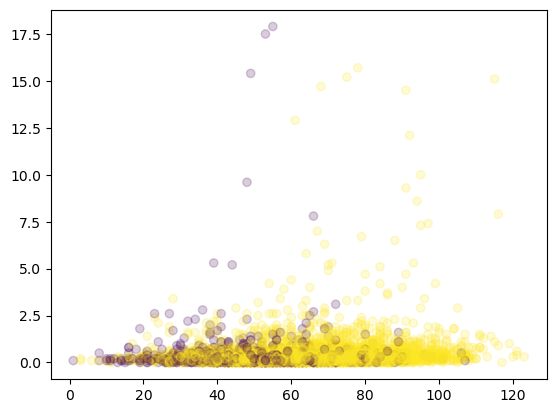

In [43]:
plt.scatter(X_train['GP'], X_train['BLK'], c= y_train, alpha=0.2)
plt.show()

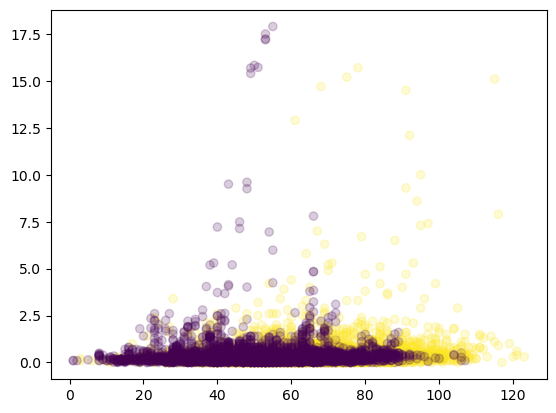

In [44]:
plt.scatter(X_res['GP'], X_res['BLK'], c= y_res, alpha=0.2)
plt.show()

<h5> After resampling, the dataset has 5517 observations with 27 features

<h4> 5. Test dataset cleaning

<h5> The same process from the training set of cleaning and feature engineering is performed for the test set

In [45]:
df_test = pd.read_csv('../data/raw/2022_test.csv')

<h5> Replacing negative values for 0 as there can't be negative values

In [46]:
X_test_ID = df_test.pop('Id')

In [47]:
df_test = df_test.abs()

In [48]:
df_test['MIN2'] = df_test['MIN']**(1/3)
df_test['AST2'] = df_test['AST']**(1/3)
df_test['PTS2'] = df_test['PTS']**(1/3)
df_test['FGM2'] = df_test['FGM']**(1/3)
df_test['FGA2'] = df_test['FGA']**(1/3)
df_test['FTM2'] = df_test['FTM']**(1/3)
df_test['FTA2'] = df_test['FTA']**(1/3)
df_test['OREB2'] = df_test['OREB']**(1/3)
df_test['DREB2'] = df_test['DREB']**(1/3)
df_test['REB2'] = df_test['REB']**(1/3)
df_test['STL2'] = df_test['STL']**(1/3)
df_test['TOV2'] = df_test['TOV']**(1/3)

In [49]:
df_test = df_test.drop(['MIN', 'AST', 'PTS', 'FGM', 'FGA', 'FTM', 'FTA', 'OREB', 'DREB', 'REB', 'STL', 'TOV'], axis = 1)

In [50]:
df_test.head()

,GP,FG%,3P Made,3PA,3P%,FT%,BLK,MIN2,AST2,PTS2,FGM2,FGA2,FTM2,FTA2,OREB2,DREB2,REB2,STL2,TOV2
0,56,43.7,0.1,0.3,7.3,63.4,0.3,2.087759,0.736806,1.587401,1.169607,1.546680,0.887904,1.062659,1.062659,0.928318,1.193483,0.584804,0.928318
1,43,46.0,0.6,1.7,35.1,75.3,0.0,2.682373,1.518294,2.161592,1.546680,2.008299,1.216440,1.357209,0.793701,0.965489,1.144714,0.843433,1.216440
2,82,45.6,0.5,1.9,44.8,71.2,0.3,3.236433,1.357209,2.244017,1.698499,2.196689,1.216440,1.392477,1.091393,1.488806,1.650964,1.091393,1.259921
3,86,42.9,0.5,1.8,13.5,70.9,0.1,3.548971,1.600521,2.659006,1.894536,2.514581,1.650964,1.846915,1.144714,1.473613,1.709976,0.965489,1.532619
4,58,40.0,0.5,1.7,38.7,76.9,0.4,2.308350,1.144714,1.675069,1.169607,1.587401,1.032280,1.091393,0.584804,0.843433,0.965489,0.793701,0.965489


<h5> Remove unique identifier

In [51]:
X_test = df_test.copy()

In [52]:
X_test = X_test.abs()

<h5> Feature engineering

In [53]:
#X_test["Min_per_GP"] = np.where(X_test["GP"]>0, X_test["MIN"] / X_test["GP"],0)

In [54]:
#X_test["3P_per_GP"] = np.where(X_test["GP"]>0, X_test["3P Made"] / X_test["GP"],0)

In [55]:
#X_test["Stl_per_GP"] = np.where(X_test["GP"]>0, X_test["STL"] / X_test["GP"],0)

In [56]:
#X_test["Reb_per_GP"] = np.where(X_test["GP"]>0, X_test["REB"] / X_test["GP"],0)

In [57]:
#X_test["Blk_per_GP"] = np.where(X_test["GP"]>0, X_test["BLK"] / X_test["GP"],0)

In [58]:
#X_test["ORtg"] = np.where(X_test["GP"]>0, 
                                 #(100*X_test["PTS"]) / 
                                 #(X_test["FGA"] + 0.44* X_test["FTA"]+X_test["TOV"]),0)

In [59]:
#X_test["PPP"] = np.where(X_test["GP"]>0, 
                                 #(X_test["PTS"]) / 
                                 #(X_test["FGA"] + 0.44* X_test["FTA"]+X_test["TOV"]),0)

In [60]:
#X_test["TSP"] = np.where(X_test["GP"]>0, 
                                 #(X_test["PTS"]) / 
                                 #(2* (X_test["FGA"] + 0.44* X_test["FTA"])),0)

<h4> <b> 6. Saving training, validation and test sets

In [61]:
#Save new test and validation sets 
from src.data.sets import save_sets

In [62]:
save_sets(X_res, X_val, y_res, y_val, X_test, X_test_ID)

<h5> Resulting training, validation and test sets are saved with a custom function into the ../data/processed folder that will be accessable for usage within future models and team members

/tmp/ipykernel_11222/3212548316.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(X_res.corr(), dtype=np.bool))


Text(0.5, 1.0, 'Triangle Correlation Heatmap - Training Data')

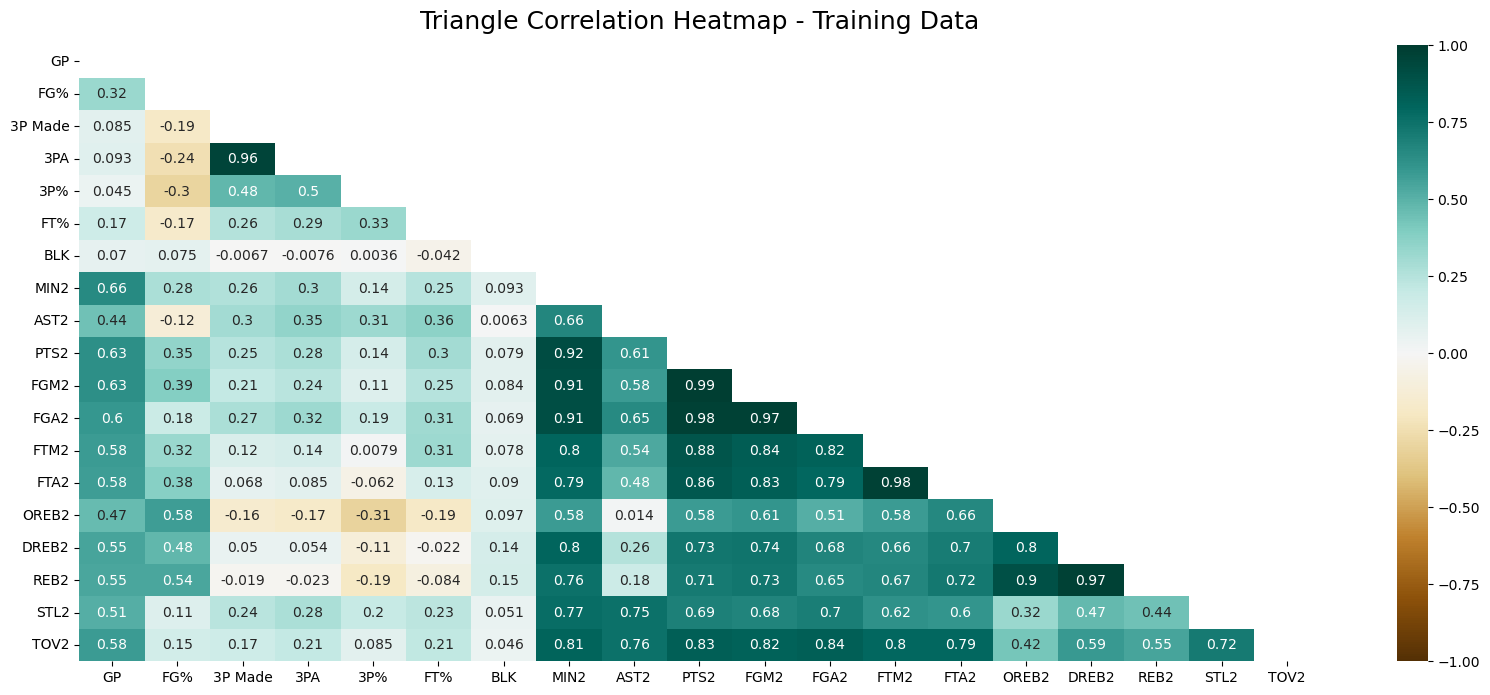

In [63]:
import seaborn as sns
plt.figure(figsize=(20, 8))
mask = np.triu(np.ones_like(X_res.corr(), dtype=np.bool))
heatmap = sns.heatmap(X_res.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Triangle Correlation Heatmap - Training Data', fontdict={'fontsize':18}, pad=12)

/tmp/ipykernel_11222/4168939196.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(X_test.corr(), dtype=np.bool))


Text(0.5, 1.0, 'Triangle Correlation Heatmap - Training Data')

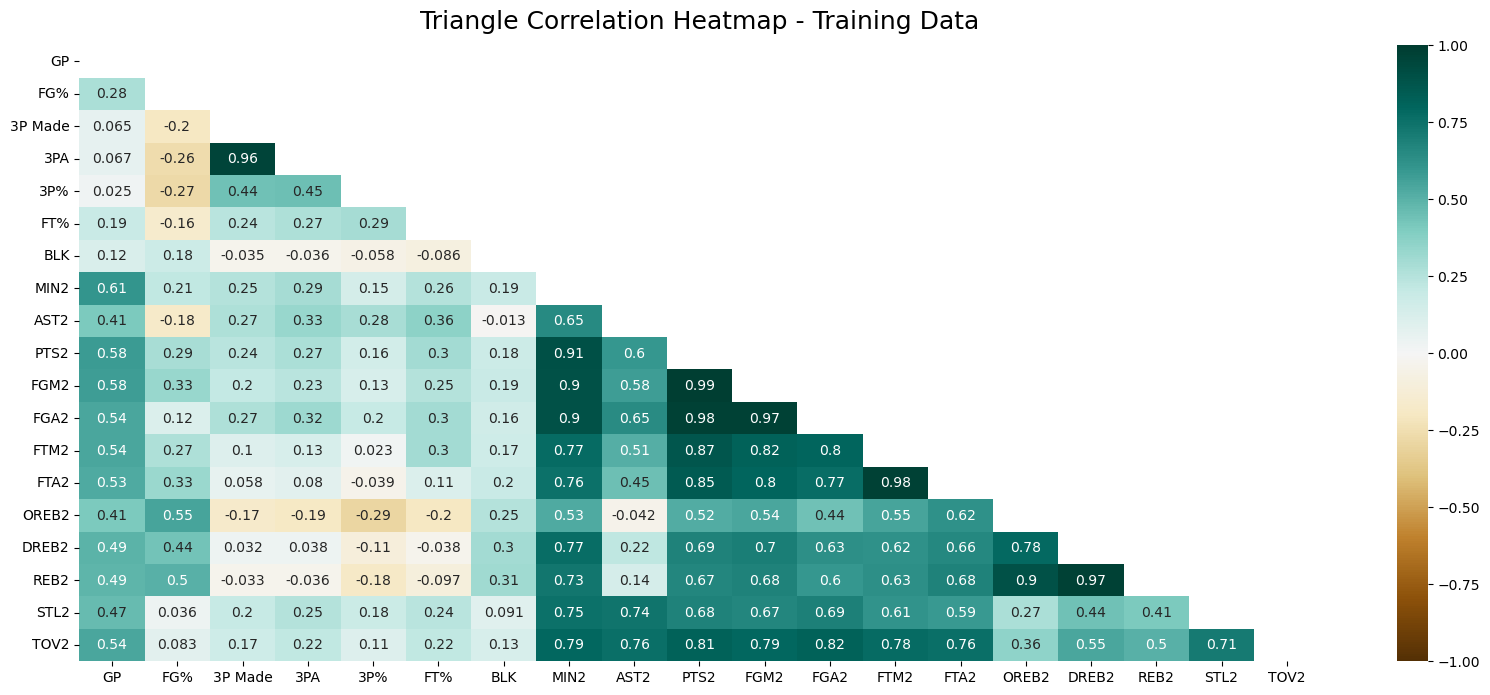

In [64]:
import seaborn as sns
plt.figure(figsize=(20, 8))
mask = np.triu(np.ones_like(X_test.corr(), dtype=np.bool))
heatmap = sns.heatmap(X_test.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Triangle Correlation Heatmap - Training Data', fontdict={'fontsize':18}, pad=12)